In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from itertools import product
from pathlib import Path
from typing import Tuple

In [2]:
experiment_path =  "/media/roboto/Tranqueiras/entropia_grafos_experimentos/experiment_mu_2_barabasi"

In [3]:
def get_runs(path: str):
    return [x for x in os.listdir(path) if "run" in x]

In [22]:
from typing import List, NewType
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


Figure = NewType('Figure', matplotlib.figure.Figure)
Axis   = NewType('Figure', matplotlib.axes.Axes)

def heat_plot(X: np.array, size: Tuple[int] = None,
              x_tick_labels: List[str] = None,
              y_tick_labels: List[str] = None,
              cmap: str = None,
              cbar: bool = False,
              fig: Figure = None,
              ax: Axis = None) -> Tuple[Figure, Axis]:
    if fig == None and ax == None:
        fig, ax = plt.subplots(1, 1)
        if size != None:
            fig.set_size_inches(size)
        else:
            fig.set_size_inches(w = 15, h = 10)
    
    sns.heatmap(X, linewidth = 0, ax = ax, cmap = cmap, cbar = cbar)
    
    ax.locator_params('x', nbins = 3)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    
    if x_tick_labels != None:
        ax.set_xticklabels(x_tick_labels)
    if y_tick_labels != None:
        ax.set_yticklabels(y_tick_labels)
    
    return fig, ax

In [11]:
mean_stats = {}
kappas = [0, 15, 30]
gammas = [-1, 0, 1]

for k, g in product(kappas, gammas):
    param = ("barabasi", 500, 2, 1, k, 0, 0, 0, g, 2)
    input_path = Path(experiment_path) / str(param)
    runs = get_runs(input_path)
    
    mean_run_stats = {
        "Entropy": np.zeros(500),
        "Proximity": np.zeros(500),
        "Polarity": np.zeros(500)
    }

    num_runs = len(runs)
    for run in runs:
        stats = pickle.load(open(input_path / run, "rb"))
        mean_run_stats['Entropy'] += stats['Entropy']
        mean_run_stats['Proximity'] += stats['Proximity']
        mean_run_stats['Polarity'] += stats['Polarity']

    mean_run_stats['Entropy'] /= num_runs
    mean_run_stats['Proximity'] /= num_runs
    mean_run_stats['Polarity'] /= num_runs
    
    mean_stats[param] = mean_run_stats

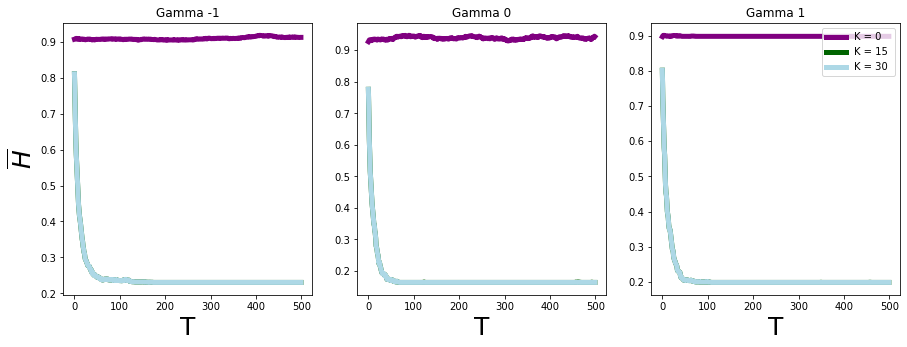

In [12]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
fig.subplots_adjust(wspace = 0.18)
for ax in axs:
#     # ax.locator_params(axis='x', nbins=5)
#     # ax.locator_params(axis='y', nbins=5)
#     ax.tick_params(axis='both', which='major', labelsize=15)
#     ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlabel("T", fontsize = 25)
    
colors = {
    0: "purple",
    15: "darkgreen",
    30: "lightblue",
}

style = {
    -10: '--',
    0: '-',
    10: ':'
}
kappas = [0, 15, 30]
gammas = [-1, 0, 1]

axs[0].set_ylabel(r"$\overline{H}$", fontsize = 25)
for i in range(len(gammas)):
    for j in range(len(kappas)):
        
        param = ("barabasi", 500, 2, 1, kappas[j], 0, 0, 0, gammas[i], 2)

        results = mean_stats[param]
        mean_entropy = results['Entropy']
        X = range(len(mean_entropy))

        axs[i].plot(X, mean_entropy, label = f'K = {kappas[j]} ', color = colors[kappas[j]], linewidth = 5)
        axs[i].set_title(f"Gamma {gammas[i]}")

axs[2].legend(fontsize = 10, loc = 1)
# fig.savefig("curvas_evolucao_entropia_barabasi.png", bbox_inches='tight')

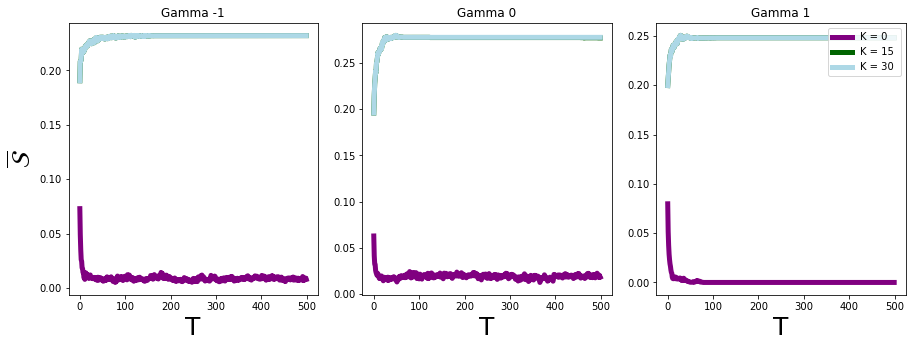

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
fig.subplots_adjust(wspace = 0.18)
for ax in axs:
#     # ax.locator_params(axis='x', nbins=5)
#     # ax.locator_params(axis='y', nbins=5)
#     ax.tick_params(axis='both', which='major', labelsize=15)
#     ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlabel("T", fontsize = 25)
    
colors = {
    0: "purple",
    15: "darkgreen",
    30: "lightblue",
}

style = {
    -10: '--',
    0: '-',
    10: ':'
}
kappas = [0, 15, 30]
gammas = [-1, 0, 1]

axs[0].set_ylabel(r"$\overline{\mathcal{S}}$", fontsize = 25)
for i in range(len(gammas)):
    for j in range(len(kappas)):
        
        param = ("barabasi", 500, 2, 1, kappas[j], 0, 0, 0, gammas[i], 2)

        results = mean_stats[param]
        mean_entropy = results['Proximity']
        X = range(len(mean_entropy))

        axs[i].plot(X, mean_entropy, label = f'K = {kappas[j]} ', color = colors[kappas[j]], linewidth = 5)
        axs[i].set_title(f"Gamma {gammas[i]}")

axs[2].legend(fontsize = 10, loc = 1)
# fig.savefig("curvas_evolucao_entropia_barabasi.png", bbox_inches='tight')

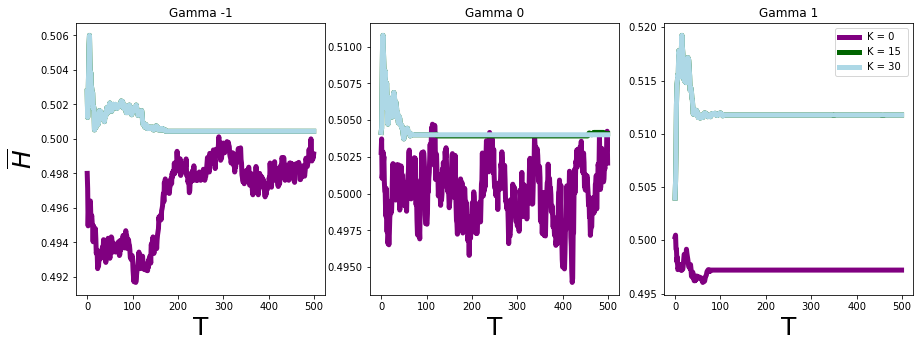

In [14]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
fig.subplots_adjust(wspace = 0.18)
for ax in axs:
#     # ax.locator_params(axis='x', nbins=5)
#     # ax.locator_params(axis='y', nbins=5)
#     ax.tick_params(axis='both', which='major', labelsize=15)
#     ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlabel("T", fontsize = 25)
    
colors = {
    0: "purple",
    15: "darkgreen",
    30: "lightblue",
}

style = {
    -10: '--',
    0: '-',
    10: ':'
}
kappas = [0, 15, 30]
gammas = [-1, 0, 1]

axs[0].set_ylabel(r"$\overline{H}$", fontsize = 25)
for i in range(len(gammas)):
    for j in range(len(kappas)):
        
        param = ("barabasi", 500, 2, 1, kappas[j], 0, 0, 0, gammas[i], 2)

        results = mean_stats[param]
        mean_entropy = results['Polarity']
        X = range(len(mean_entropy))

        axs[i].plot(X, mean_entropy, label = f'K = {kappas[j]} ', color = colors[kappas[j]], linewidth = 5)
        axs[i].set_title(f"Gamma {gammas[i]}")

axs[2].legend(fontsize = 10, loc = 1)
# fig.savefig("curvas_evolucao_entropia_barabasi.png", bbox_inches='tight')